<a href="https://colab.research.google.com/github/Lakshmi-Priya-Y/FMML_projects_labs_2024/blob/main/Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and Probability: Fundamentals

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [2]:
def coin(no_of_tosses = 10):
  return pd.Series(np.random.choice(['Heads','Tails'],no_of_tosses))

In [3]:
def dice(no_of_tosses = 10):
  return pd.Series(np.random.randint(1,6+1,no_of_tosses))

tossing a coin

In [4]:
res = coin()
print(res.value_counts())
figure = pg.Figure([pg.Bar(x=res.value_counts().keys(),y = res.value_counts().values)])
figure.show()

Heads    7
Tails    3
Name: count, dtype: int64


Dice

In [5]:
results = dice()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x = results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

2    4
5    3
1    2
3    1
Name: count, dtype: int64


#Derived Probability Distributions

Given 20 coin tosses , what is the probability that 7 of them are heads?

In [6]:
results = pd.Series([np.sum(coin(20)=='Heads')for _ in range(100)])
print(results)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),y = results.value_counts().values)])
fig.show()

0      9
1      9
2     10
3     11
4     13
      ..
95     9
96    13
97    10
98    12
99    12
Length: 100, dtype: int64


In [7]:
results = pd.Series([np.sum(coin(20) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x= results.value_counts().keys(), y = results.value_counts().values)])
fig.show()

In [8]:
res = {shot: dice(shot) for shot in [10,100,1000,10000,100000]}
fig = pg.Figure([pg.Bar(x = result.value_counts().keys(), y = result.value_counts().values/shot) for shot,result in res.items()])
fig.add_shape(type = 'line', x0 = 0.25, y0 = 0.15, x1 = 6.5, y1 = 0.15, line = dict(color='blue'))
fig.show()

# Try to solve these questions:

 1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

In [9]:
total_cards = 52
each_numbered_cards = 4
numbered_card_values = range(2,11)
numbered_cards = len(numbered_card_values) * each_numbered_cards
probability = numbered_cards/total_cards
print(f"The probability of drawing a numbered card is {probability:2f}")

The probability of drawing a numbered card is 0.692308


2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

In [10]:
probability_second_draw = probability*probability #The probability of second draw is the square of probability of single draw which is already calculated above
print(f"The probability of two cards being numbered cards is {probability_second_draw:2f}")

The probability of two cards being numbered cards is 0.479290


3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

In [11]:
new_total_cards = total_cards - 1
new_total_numbered_cards = numbered_cards - 1
new_probability = new_total_numbered_cards/new_total_cards
total_probability = probability*new_probability
print(f"The probability of two cards being numbered is {total_probability:2f}")

The probability of two cards being numbered is 0.475113


4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

In [12]:
bottom_card_probability = numbered_cards / total_cards
print(f"The probability of the bottom card of the cut is an numbered card is {bottom_card_probability: 2f}")

The probability of the bottom card of the cut is an numbered card is  0.692308


* You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards
one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

MY SOLUTION

In [13]:
aces = 4
expected_first_ace_position = total_cards/ (aces+1)
expected_non_ace_cards = expected_first_ace_position  - 1
print(f"the expected non ace cards before encountering the first ace are: {expected_non_ace_cards:f}")

the expected non ace cards before encountering the first ace are: 9.400000


In [14]:
def numbered_cards_thrown(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = numbered_cards_thrown(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

2 cards were thrown: QH 3D AD
16 cards were thrown: KC QS 8S 2C 6D 7D 9H 3D 4D 7S 5H 6S 8C 2H 6H 10H AD
3 cards were thrown: 4H 7C JS AC
2 cards were thrown: QC 5C AD
11 cards were thrown: 2S 5S 8C 6S 2D JH KD 8H 7S KS 3H AH
19 cards were thrown: 4C 2C 8S KH KC 5H 8C 10D 3H 6C 7C QC 5D 5C 8H 2S 9C 3S JD AD
4 cards were thrown: 3D KD 9D JH AH
10 cards were thrown: 8D QS 9C 3S 3H 7C 5S JC JS 10S AC
9 cards were thrown: JH 3H QD 4H 9C 5D 6C KH KD AS
1 cards were thrown: JC AS

9.6166 cards are tossed before we see the first ace!


In [15]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x = results.value_counts().keys(), y = results.value_counts().values)])
fig.show()

#Using Mean Squared Error

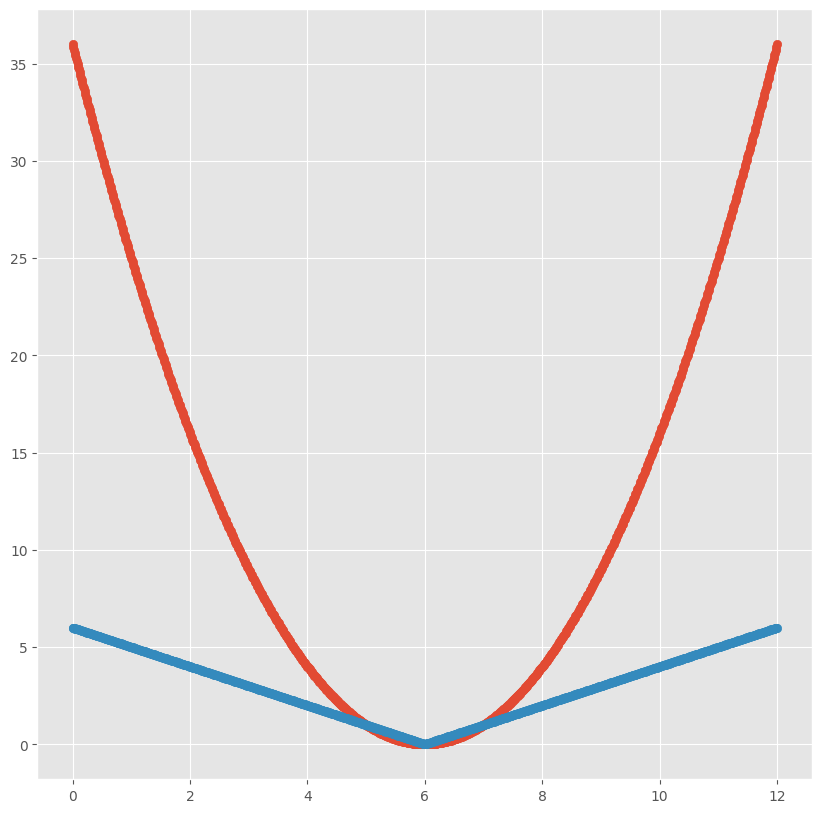

In [16]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

# Standardisation

In [18]:
grades = pd.read_csv('grades.csv')
print(grades.shape)
aggregated_data = grades[['Physics','Biology','Maths']].agg(['mean','var','std'])
print(aggregated_data)

(26, 4)
         Physics     Biology       Maths
mean   63.769231   67.038462   69.769231
var   517.224615  456.758462  300.664615
std    22.742573   21.371908   17.339683


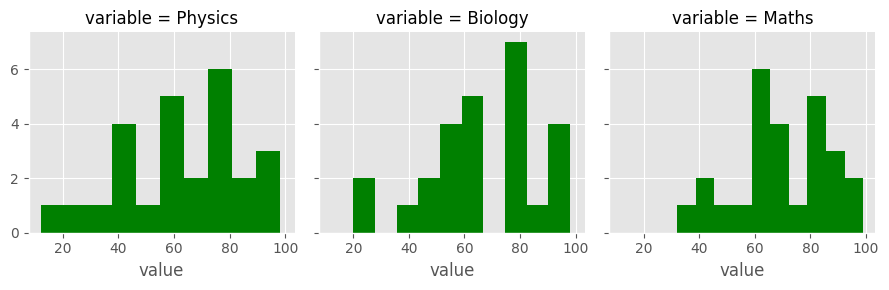

In [22]:
grade = sns.FacetGrid(grades.melt("Name"),col = 'variable')
grade.map(plt.hist, 'value' , color = "green")

* Standardisation of scores

In [23]:
grades['Physics_std'] = (grades['Physics'] - grades['Physics'].mean()) / grades['Physics'].std()

In [25]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [27]:
grades['Biology_std'] = (grades['Biology'] - grades['Biology'].mean()) / grades['Biology'].std()

In [28]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Biology_std
0,Arnold,80,78,70,0.713673,0.512895
1,Bob,60,98,45,-0.165735,1.448703
2,Cassandra,34,56,65,-1.308965,-0.516494
3,Donovan,56,65,32,-0.341616,-0.095380
4,Emily,98,23,55,1.505141,-2.060577


In [29]:
grades.tail()

,Name,Physics,Biology,Maths,Physics_std,Biology_std
21,Vanessa,50,48,98,-0.605439,-0.890817
22,Wilson,66,75,67,0.098088,0.372524
23,Xavier,89,75,40,1.109407,0.372524
24,Yuki,60,20,59,-0.165735,-2.200948
25,Zayn,24,37,82,-1.748669,-1.405511


In [30]:
grades['Maths_std'] = (grades['Maths'] - grades['Maths'].mean())/grades['Maths'].std()

In [31]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Biology_std,Maths_std
0,Arnold,80,78,70,0.713673,0.512895,0.013309
1,Bob,60,98,45,-0.165735,1.448703,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.516494,-0.275047
3,Donovan,56,65,32,-0.341616,-0.095380,-2.178196
4,Emily,98,23,55,1.505141,-2.060577,-0.851759


# Probability Distributions
# Binomial Distributions

The binomial distribution models the probability of *k* successes in *n* independent trials

In [32]:
from scipy.stats import binom

* If the chance of winning a game is 0.75, what is the probability of losing all 5 games?

In [36]:
binom.pmf(k=0,n=5,p=0.75) #probability of winning zero games so k = 0 and p = 0.75

0.0009765624999999992

* The probability of winning 3 games or less

In [37]:
binom.pmf(k=0,n=5,p=0.75) + binom.pmf(k=1,n=5,p=0.75) + binom.pmf(k=2,n=5,p=0.75) + binom.pmf(k=3,n=5,p=0.75)

0.3671874999999998

* the same question but using cumulative density function at X = 3

In [38]:
binom.cdf(3, n=5, p = 0.75)

0.3671875

# Normal Distribution

In [40]:
from scipy.stats import norm

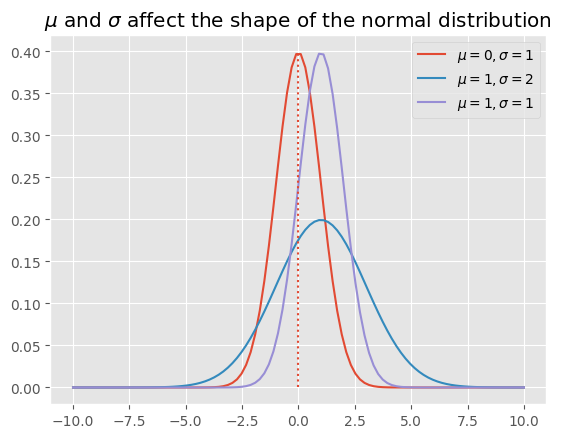

In [45]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=2)
f3 = norm.pdf(x, loc=1, scale=1)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=2$")
plt.plot(x, f3, label="$\mu=1, \sigma=1$")
plt.vlines(x=0, ymin=0, ymax=0.4, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

# Programmatic Solutions: percent point function

In [48]:
norm.cdf(0.5) #Cumulative density function

0.6914624612740131

In [49]:
norm.ppf(0.6914624612740131) #percent point function

0.5000000000000001

# Example: height
Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

* 84% of Malaysians have height of less than ... cm

In [50]:
norm.ppf(0.84, loc = 169.57, scale = 7.57)

177.09804617589782

In [52]:
169.57 + 7.57 #approximate

177.14

* The tallest 2.5% of Malaysians are taller than ... cm

In [53]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [54]:
169.57 + 2 * 7.57 #approximate

184.70999999999998

* The shortest 0.15% of Malaysians are shorter than ... cm

In [55]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [56]:
169.57 - 3 * 7.57 #approximate

146.85999999999999

# Poisson Distribution

In [57]:
from scipy.stats import poisson

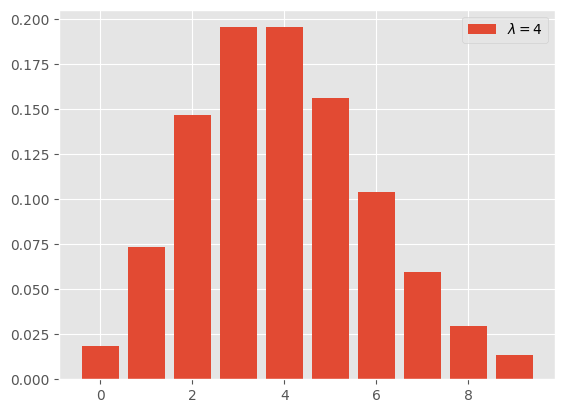

In [65]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=4)
f2 = poisson.pmf(x, mu=5)
f3 = poisson.pmf(x, mu=6)
plt.bar(x, f1, label="$\lambda=4$")
plt.legend()

In [64]:
x @ f1 #this is equal to lambda

3.9145462620480624

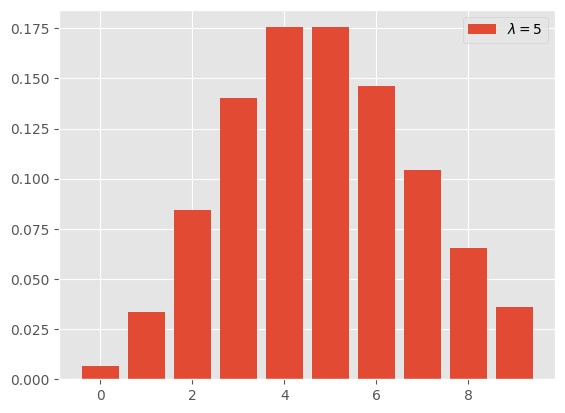

In [68]:
plt.bar(x, f2, label="$\lambda=5$")
plt.legend()

In [69]:
x @ f2 #this is equal to lambda

4.659531826390754

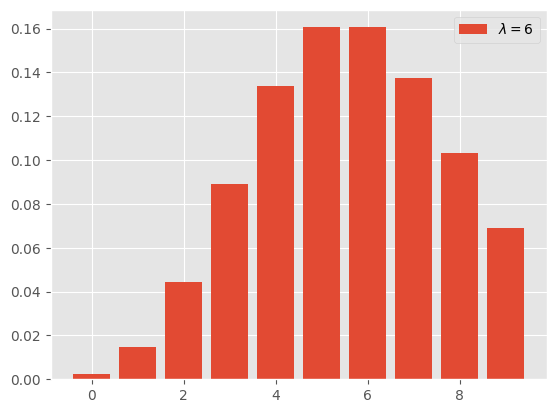

In [70]:
plt.bar(x, f3, label="$\lambda=6$")
plt.legend()

In [71]:
x @ f3

5.083424963907366

* Example: Suppose emergency calls per hour follow a Poisson distribution and occur at a rate of 5 calls per hour. What is the probability of receiving 2 calls in any given hour?

In [72]:
poisson.pmf(2,5)

0.08422433748856832

# Central Limit Theorem

In [73]:
from scipy.stats import poisson

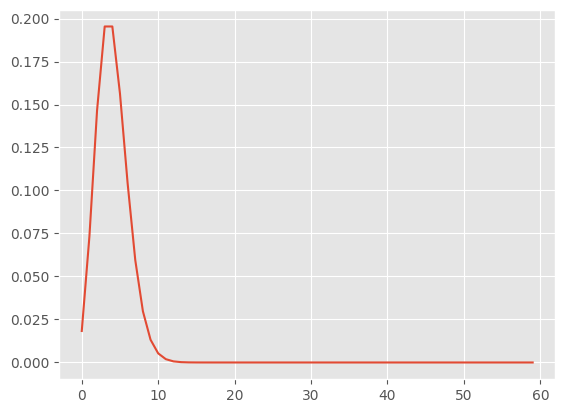

In [79]:
bins = np.arange(0,60)
pois = poisson.pmf(bins,mu=4)
plt.plot(bins,pois)

(array([  7.,  28.,  80., 115., 136., 131.,  68.,  25.,   7.,   3.]),
 array([2.2   , 2.3775, 2.555 , 2.7325, 2.91  , 3.0875, 3.265 , 3.4425,
        3.62  , 3.7975, 3.975 ]),
 <BarContainer object of 10 artists>)

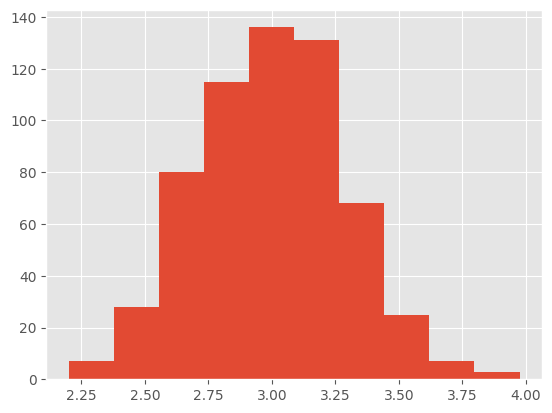

In [82]:
def sample(_):
  samples = poisson.rvs(mu=3, size = 40)
  return np.mean(samples)
means = list(map(sample,np.arange(600)))
plt.hist(means)

# Using Normal Distribution  in Weight Initialization

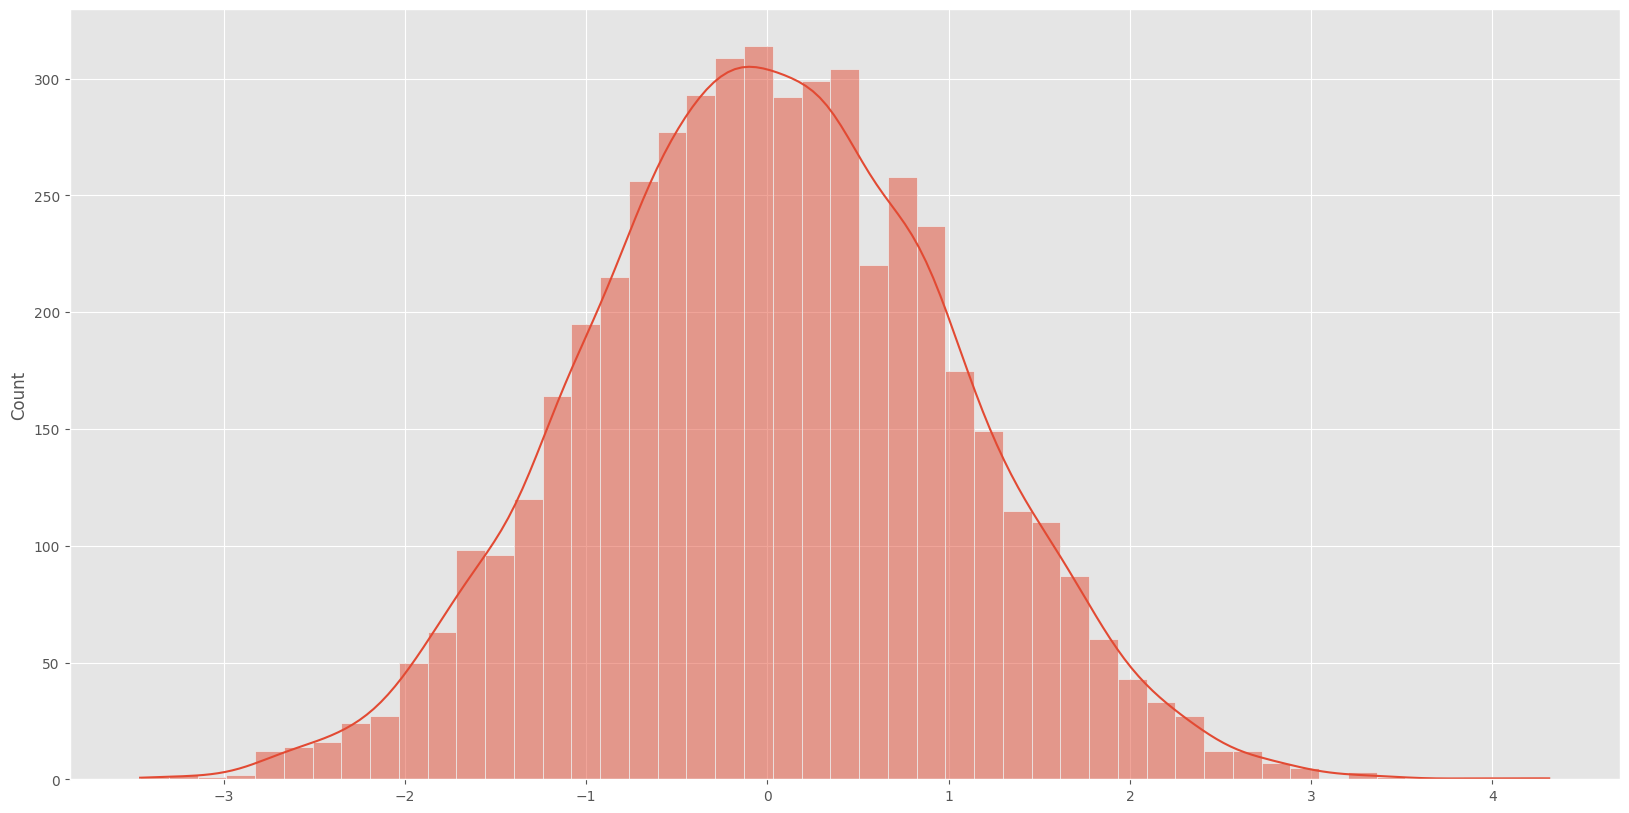

In [85]:
import seaborn as sns
plt.figure(figsize = (20,10))
x = np.random.normal(size = (5000))
sns.histplot(x,kde=True)
plt.show()

# A solid-liquid-gas Example

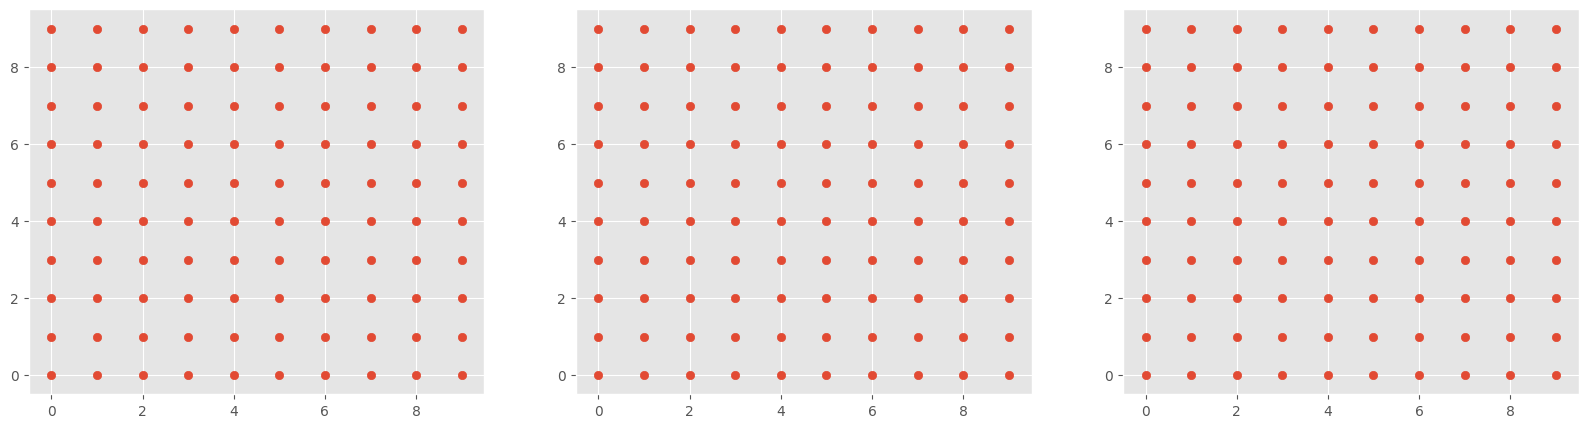

In [95]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

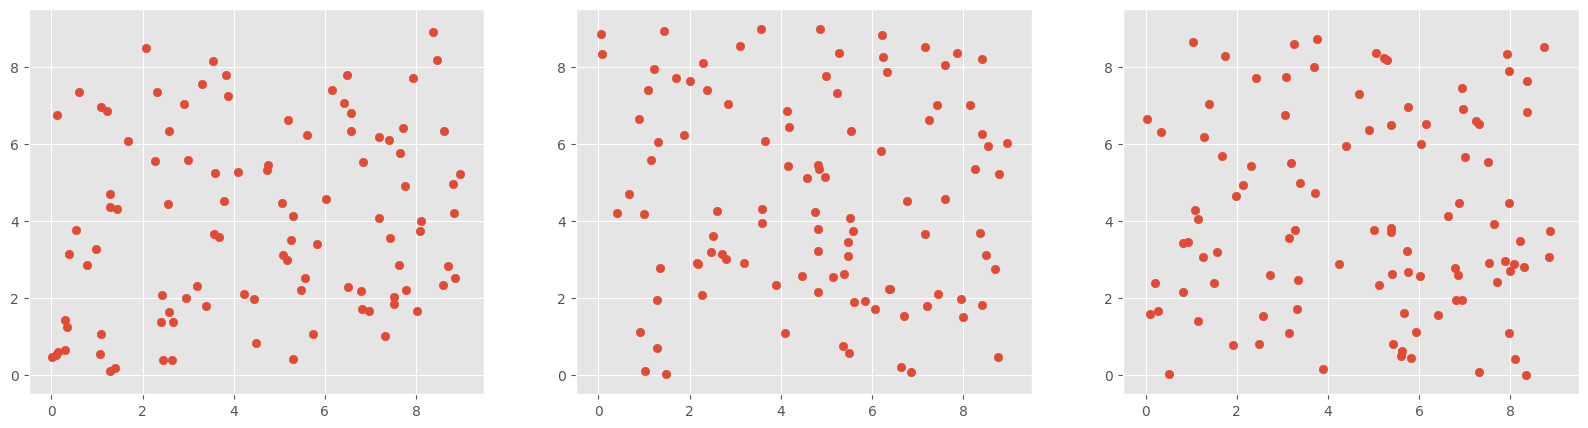

In [96]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)
plt.show()

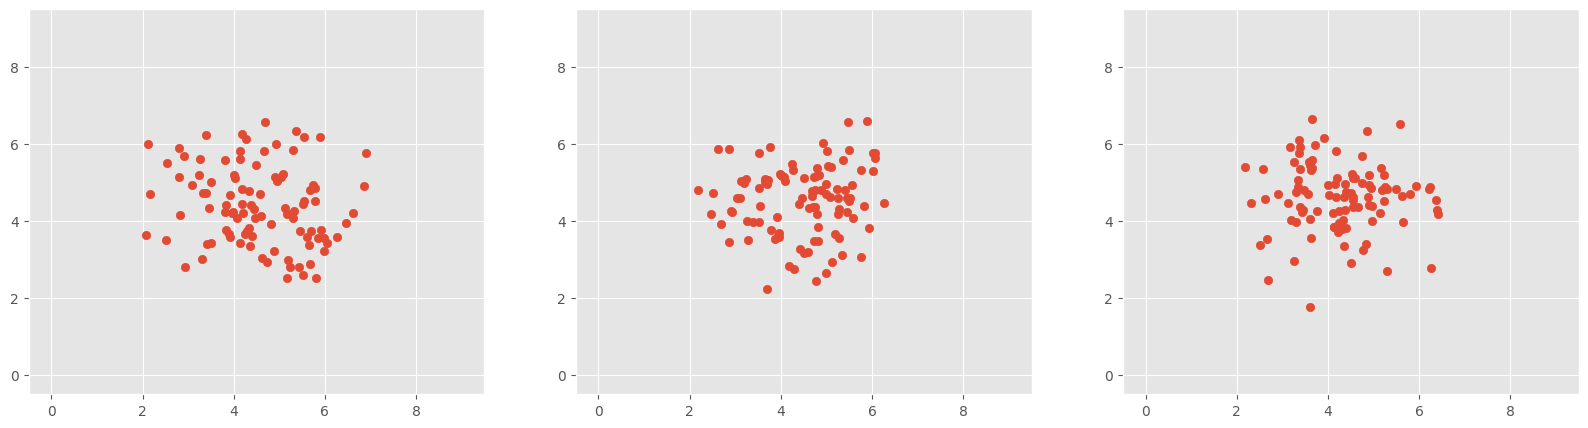

In [97]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()